Problem: https://www.kaggle.com/c/rossmann-store-sales/overview<br>
References: https://colab.research.google.com/drive/1yTF8Yzzn3jtSFVm8NQJQ8qkTGG98G25a#scrollTo=pCw6Tq60DCRI<br>
https://www.kaggle.com/code/elenapetrova/time-series-analysis-and-forecasts-with-prophet

TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE by taking a look at the 2 links above

TASK #2: IMPORT LIBRARIES AND DATASET

In [ ]:
pip install -r ../requirements_dev.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
sales_train_df = pd.read_csv('../input_data/rossmann_store_sales/train.csv', low_memory=False)

In [ ]:
sales_train_df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
sales_train_df.tail(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017199,1106,2,2013-01-01,0,0,0,0,a,1
1017200,1107,2,2013-01-01,0,0,0,0,a,1
1017201,1108,2,2013-01-01,0,0,0,0,a,1
1017202,1109,2,2013-01-01,0,0,0,0,a,1
1017203,1110,2,2013-01-01,0,0,0,0,a,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [ ]:
sales_train_df.info()
# 9 columns in total
# 8 features, each contains 1017209 data points
# 1 target variable (sales)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
sales_train_df.describe()
# Average sales amount per day = 5773 Euros, minimum sales per day = 0, maximum sales per day = 41551
# Average number of customers = 633, minimum number of customers = 0, maximum number of customers = 7388

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
store_info_df = pd.read_csv('../input_data/rossmann_store_sales/store.csv', low_memory=False)

In [ ]:
store_info_df.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
# Let's do the same for the store_info_df data
# Note that the previous dataframe includes the transactions recorded per day (in millions)
# This dataframe only includes information about the unique 1115 stores that are part of this study
store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
store_info_df.describe()
# on average, the competition distance is 5404 meters away (5.4 kms)

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


<Axes: >

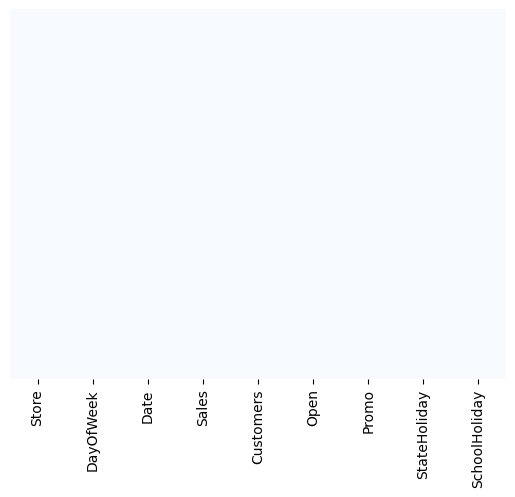

In [ ]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(sales_train_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'DayOfWeek'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Customers'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Promo'}>],
       [<Axes: title={'center': 'SchoolHoliday'}>, <Axes: >, <Axes: >]],
      dtype=object)

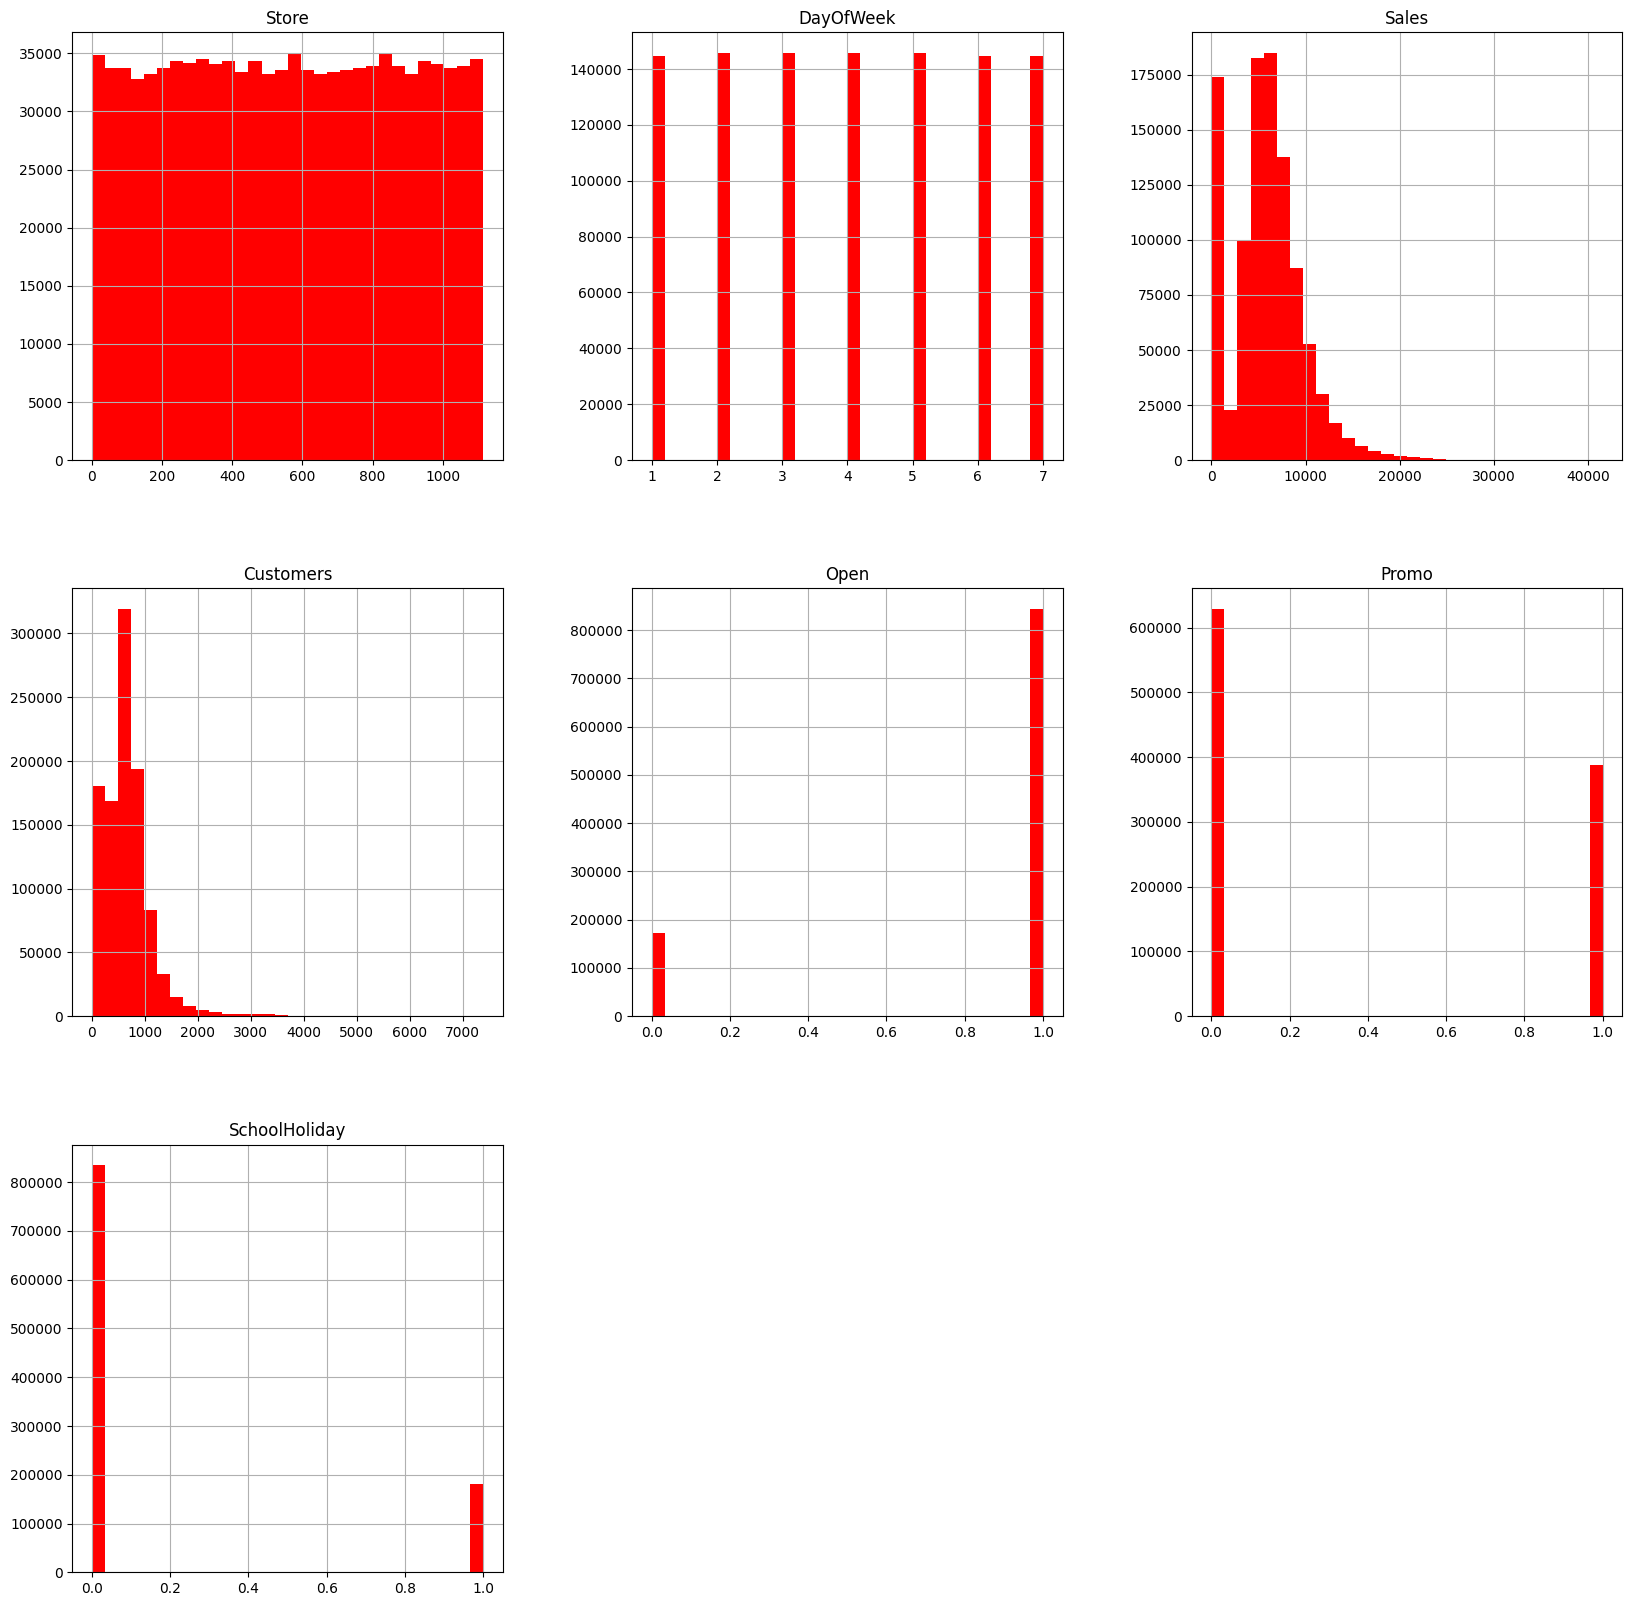

In [ ]:
sales_train_df.hist(bins=30, figsize=(20, 20), color='r')
# Store chart: Data is equally distributed among all stores (no bias)
# DayOfWeek chart: Data is equally distributed across various Days of the week (~150000 observations x 7 day = ~1.1 million observation)
# Sales chart: Average sales around 5000-6000 Euros
# Customers chart:Average 600 customers per day, maximum is 4500 (note that we can't see the outlier at 7388!)
# Open chart: Stores are open ~80% of the time
# Promo chart: Promo #1 was running ~40% of the time
# SchoolHoliday chart: School holidays are around ~18% of the time

In [ ]:
sales_train_df['Customers'].max()

np.int64(7388)

In [ ]:
# Let's see how many stores are open and closed!
closed_train_df = sales_train_df[sales_train_df['Open'] == 0]
open_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [ ]:
# Count the number of stores that are open and closed
print("Total =", len(sales_train_df))
print("Number of closed stores =", len(closed_train_df))
print("Number of open stores =", len(open_train_df))

Total = 1017209
Number of closed stores = 172817
Number of open stores = 844392


In [ ]:
# only keep open stores and remove closed stores
sales_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [ ]:
sales_train_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [ ]:
# Let's drop the open column since it has no meaning now
sales_train_df.drop(['Open'], axis=1, inplace=True)

In [ ]:
sales_train_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1
5,6,5,2015-07-31,5651,589,1,0,1
6,7,5,2015-07-31,15344,1414,1,0,1
7,8,5,2015-07-31,8492,833,1,0,1
8,9,5,2015-07-31,8565,687,1,0,1
9,10,5,2015-07-31,7185,681,1,0,1


In [ ]:
sales_train_df.describe()
# Average sales = 6955 Euros,	average number of customers = 762	(went up)

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


In [ ]:
# adding the column SalePerCustomer
sales_train_df['SalePerCustomer'] = sales_train_df['Sales'] / sales_train_df['Customers']
print(sales_train_df['SalePerCustomer'].describe())

count    844340.000000
mean          9.493619
std           2.197494
min           0.000000
25%           7.895563
50%           9.250000
75%          10.899729
max          64.957854
Name: SalePerCustomer, dtype: float64


On average customers spend about 9.50 Euro per day. Though there are days with Sales equal to zero.

In [ ]:
# opened stores with zero sales
zero_sales = sales_train_df[(sales_train_df.Sales == 0) & (sales_train_df.StateHoliday == "0")]
print("In total: ", zero_sales.shape)
zero_sales.head(5)

In total:  (54, 9)


,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,SalePerCustomer
86825,971,5,2015-05-15,0,0,0,0,1,NaN
142278,674,4,2015-03-26,0,0,0,0,0,NaN
196938,699,4,2015-02-05,0,0,1,0,0,NaN
322053,708,3,2014-10-01,0,0,1,0,0,NaN
330176,357,1,2014-09-22,0,0,0,0,0,NaN


Interestingly enough, there are opened store with no sales on working days. There are only 54 days in the data, so we can assume that there were external factors involved, for example manifestations.<br>
Closed stores and days which didn't have any sales won't be counted into the forecasts. So let's get rid of them


In [ ]:
sales_train_df = sales_train_df[sales_train_df.Sales > 0]
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,SalePerCustomer
0,1,5,2015-07-31,5263,555,1,0,1,9.482883
1,2,5,2015-07-31,6064,625,1,0,1,9.702400
2,3,5,2015-07-31,8314,821,1,0,1,10.126675
3,4,5,2015-07-31,13995,1498,1,0,1,9.342457
4,5,5,2015-07-31,4822,559,1,0,1,8.626118
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,0,a,1,5.962898
1016827,733,2,2013-01-01,10765,2377,0,a,1,4.528818
1016863,769,2,2013-01-01,5035,1248,0,a,1,4.034455
1017042,948,2,2013-01-01,4491,1039,0,a,1,4.322425


<Axes: >

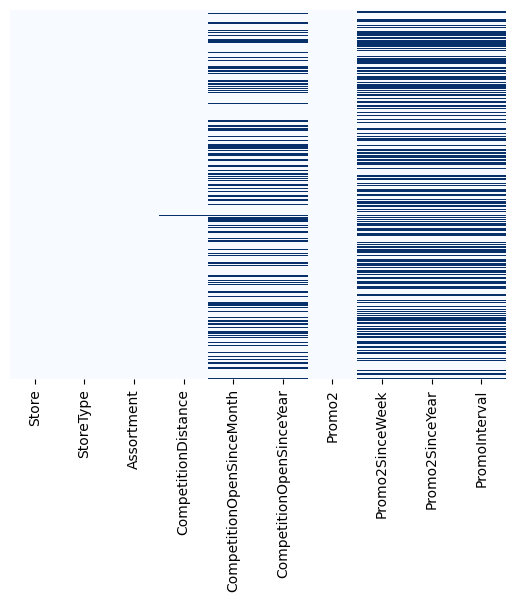

In [ ]:
# Let's see if we have any missing data in the store information dataframe!
sns.heatmap(store_info_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

In [ ]:
# Let's take a look at the missing values in the 'CompetitionDistance'
# Only 3 rows are missing
df_missing = store_info_df[store_info_df['CompetitionDistance'].isnull()]
print("Missing total: ", df_missing.shape)
df_missing

Missing total:  (3, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [ ]:
# Let's take a look at the missing values in the 'CompetitionOpenSinceMonth'
# many rows are missing = 354 (almost one third of the 1115 stores)
df_missing = store_info_df[store_info_df['CompetitionOpenSinceMonth'].isnull()]
print("Missing total: ", df_missing.shape)
df_missing.head(5)

Missing total:  (354, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"


In [ ]:
df_missing = store_info_df[store_info_df['Promo2'] == 0]
print("Missing total: ", df_missing.shape)
df_missing.head(5)

Missing total:  (544, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN


In [ ]:
# It seems like if 'promo2' is zero, 'promo2SinceWeek', 'Promo2SinceYear', and 'PromoInterval' information is set to zero
# There are 354 rows where 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth' is missing
# Let's set these values to zeros
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceYear',
            'CompetitionOpenSinceMonth']

for str in str_cols:
    store_info_df[str].fillna(0, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7024\3444291848.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_info_df[str].fillna(0, inplace=True)


<Axes: >

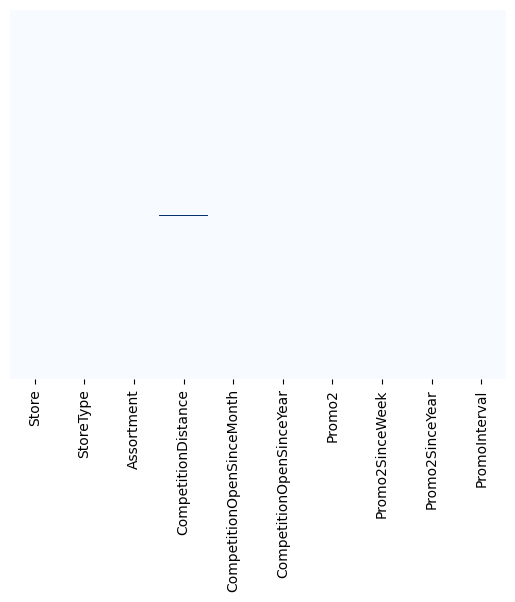

In [ ]:
 sns.heatmap(store_info_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

In [ ]:
# There are 3 rows with 'competitionDistance' values missing, let's fill them up with median values of the 'CompetitionDistance' column
store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].median(), inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7024\3943271581.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].median(), inplace=True)


<Axes: >

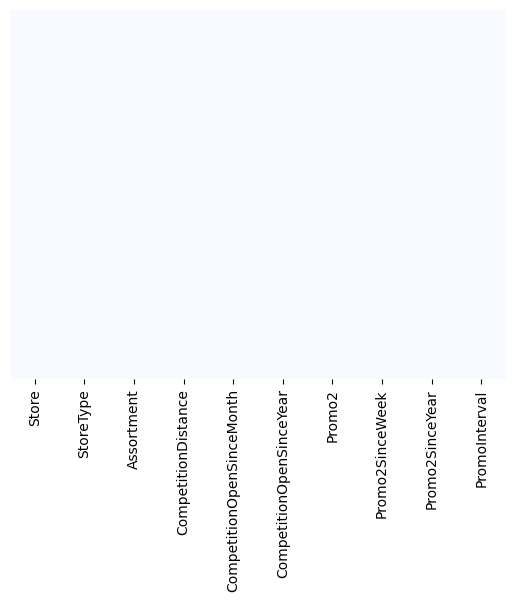

In [ ]:
 sns.heatmap(store_info_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'CompetitionDistance'}>,
        <Axes: title={'center': 'CompetitionOpenSinceMonth'}>],
       [<Axes: title={'center': 'CompetitionOpenSinceYear'}>,
        <Axes: title={'center': 'Promo2'}>,
        <Axes: title={'center': 'Promo2SinceWeek'}>],
       [<Axes: title={'center': 'Promo2SinceYear'}>, <Axes: >, <Axes: >]],
      dtype=object)

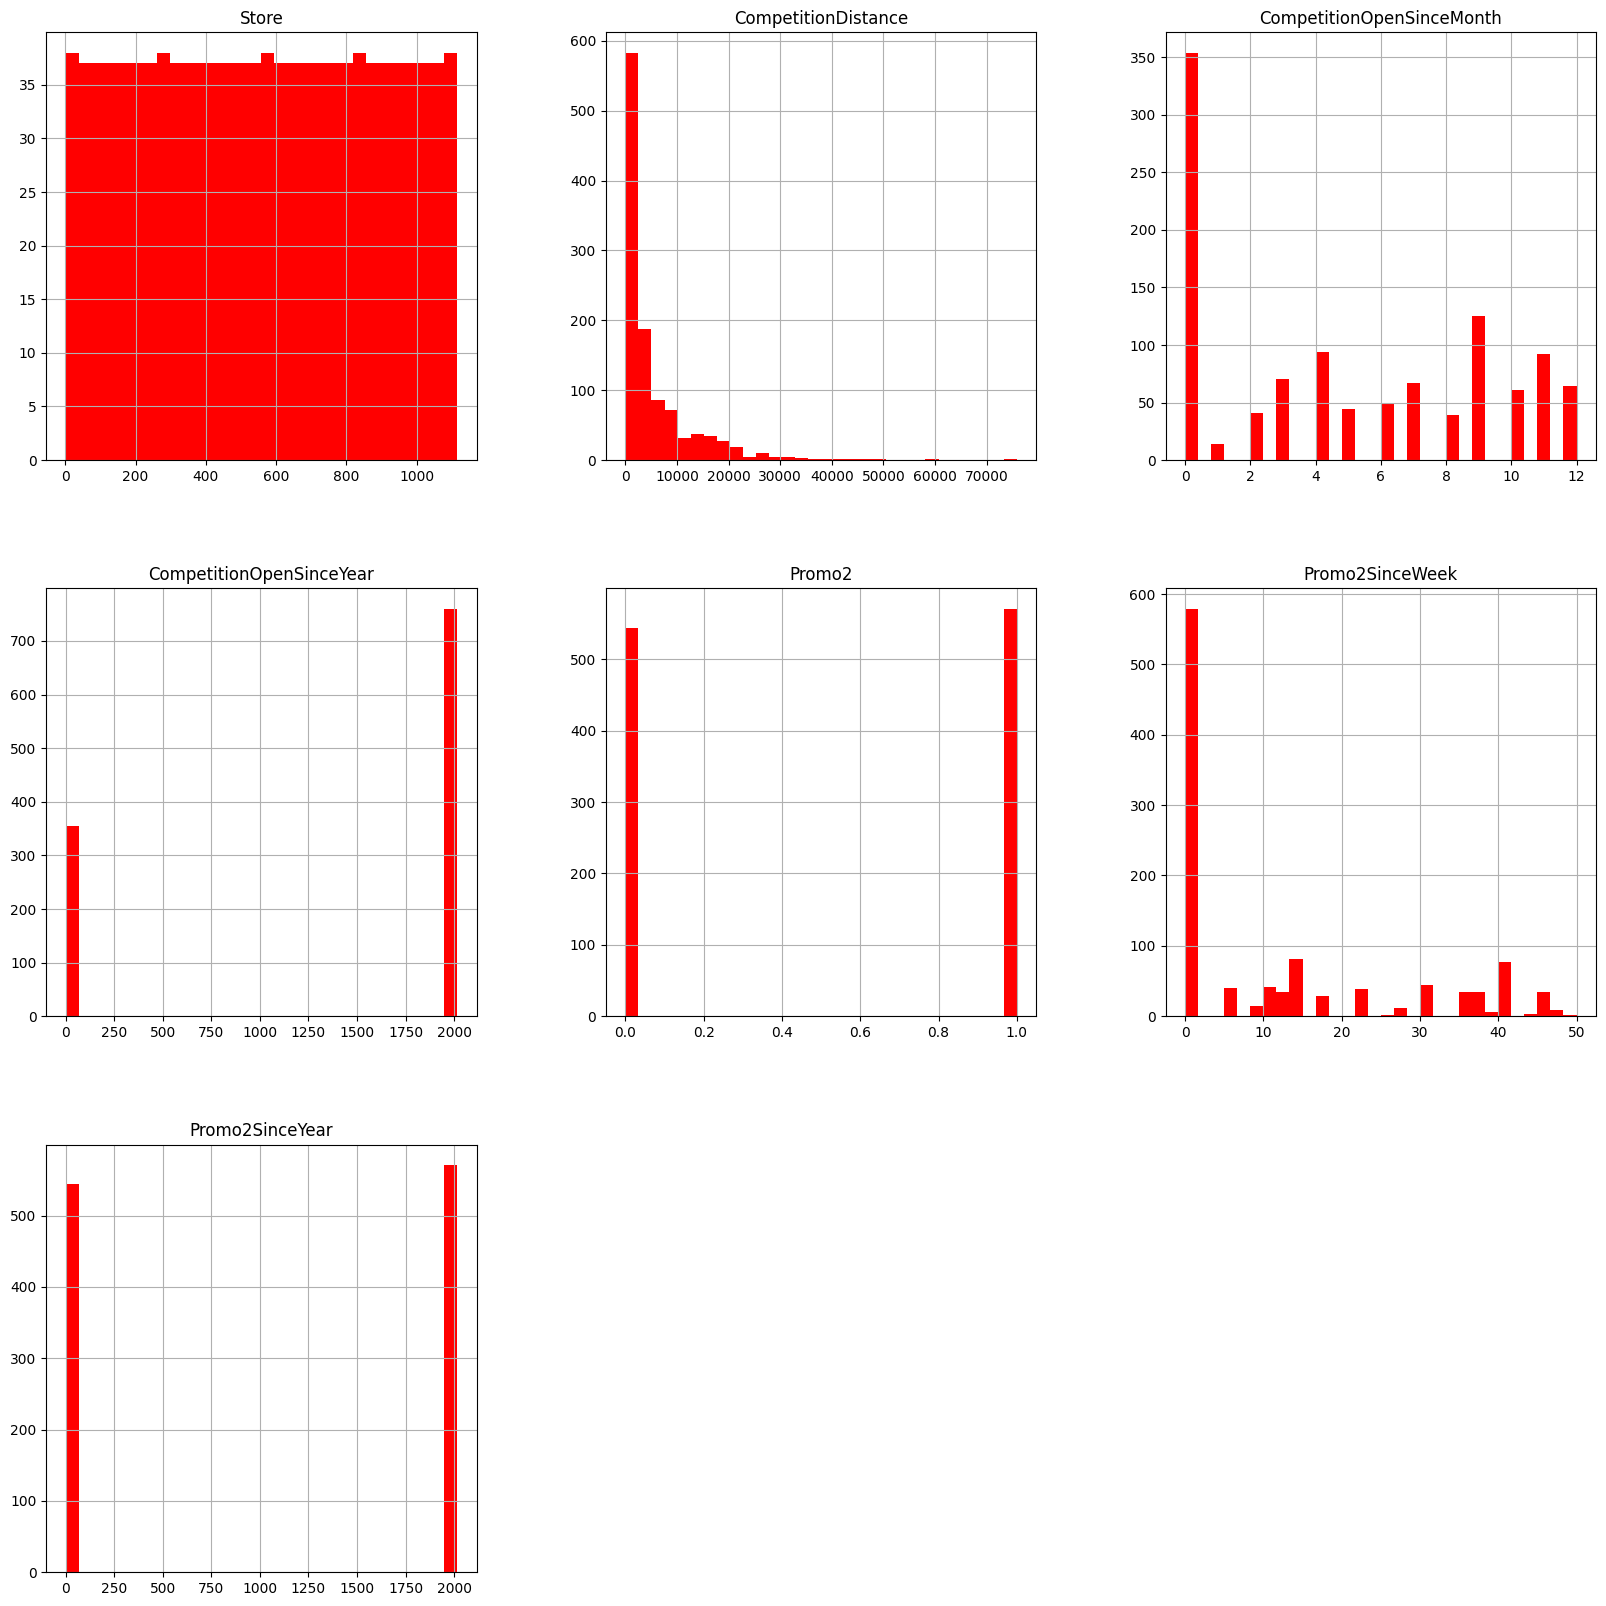

In [ ]:
store_info_df.hist(bins=30, figsize=(20, 20), color='r')
# Promo2 chart: half of stores are involved in promo 2
# CompetitionDistance chart: half of the stores have their competition at a distance of 0-3000m (3 kms away) -> TODO

In [ ]:
# Let's merge both data frames together based on 'store'
sales_train_all_df = pd.merge(sales_train_df, store_info_df, how='inner', on='Store')
print("In total: ", sales_train_all_df.shape)
sales_train_all_df.head()


In total:  (844338, 18)


,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,0,1,9.702400,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,0,1,10.126675,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,0,1,9.342457,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,0,1,8.626118,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


Store types<br>
In this section we will closely look at different levels of StoreType and how the main metric Sales is distributed among them.

In [ ]:
sales_train_all_df.groupby('StoreType')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,457042.0,6925.697986,3277.351589,46.0,4695.25,6285.0,8406.00,41551.0
b,15560.0,10233.380141,5155.729868,1252.0,6345.75,9130.0,13184.25,38722.0
c,112968.0,6933.126425,2896.958579,133.0,4916.00,6408.0,8349.25,31448.0
d,258768.0,6822.300064,2556.401455,538.0,5050.00,6395.0,8123.25,38037.0


StoreType B has the highest average of Sales among all others, however we have much less data for it. So let's print an overall sum of Sales and Customers to see which StoreType is the most selling and crowded one:<br><br>

Correlational Analysis<br>

We are finished with adding new variables to the data, so now we can check the overall correlations by plotting the seaborn heatmap:

In [ ]:
correlations = sales_train_all_df.drop(["Date", "StateHoliday", "StoreType", "Assortment", "PromoInterval"], axis = 1).corr()['Sales'].sort_values()
print(correlations)

# customers and promo are positively correlated with the sales
# Promo2 does not seem to be effective at all

DayOfWeek                   -0.178753
Promo2SinceYear             -0.127581
Promo2                      -0.127556
Promo2SinceWeek             -0.058493
CompetitionDistance         -0.035908
CompetitionOpenSinceMonth   -0.018369
CompetitionOpenSinceYear     0.005257
Store                        0.007723
SchoolHoliday                0.038635
SalePerCustomer              0.186563
Promo                        0.368199
Customers                    0.823552
Sales                        1.000000
Name: Sales, dtype: float64


<Axes: >

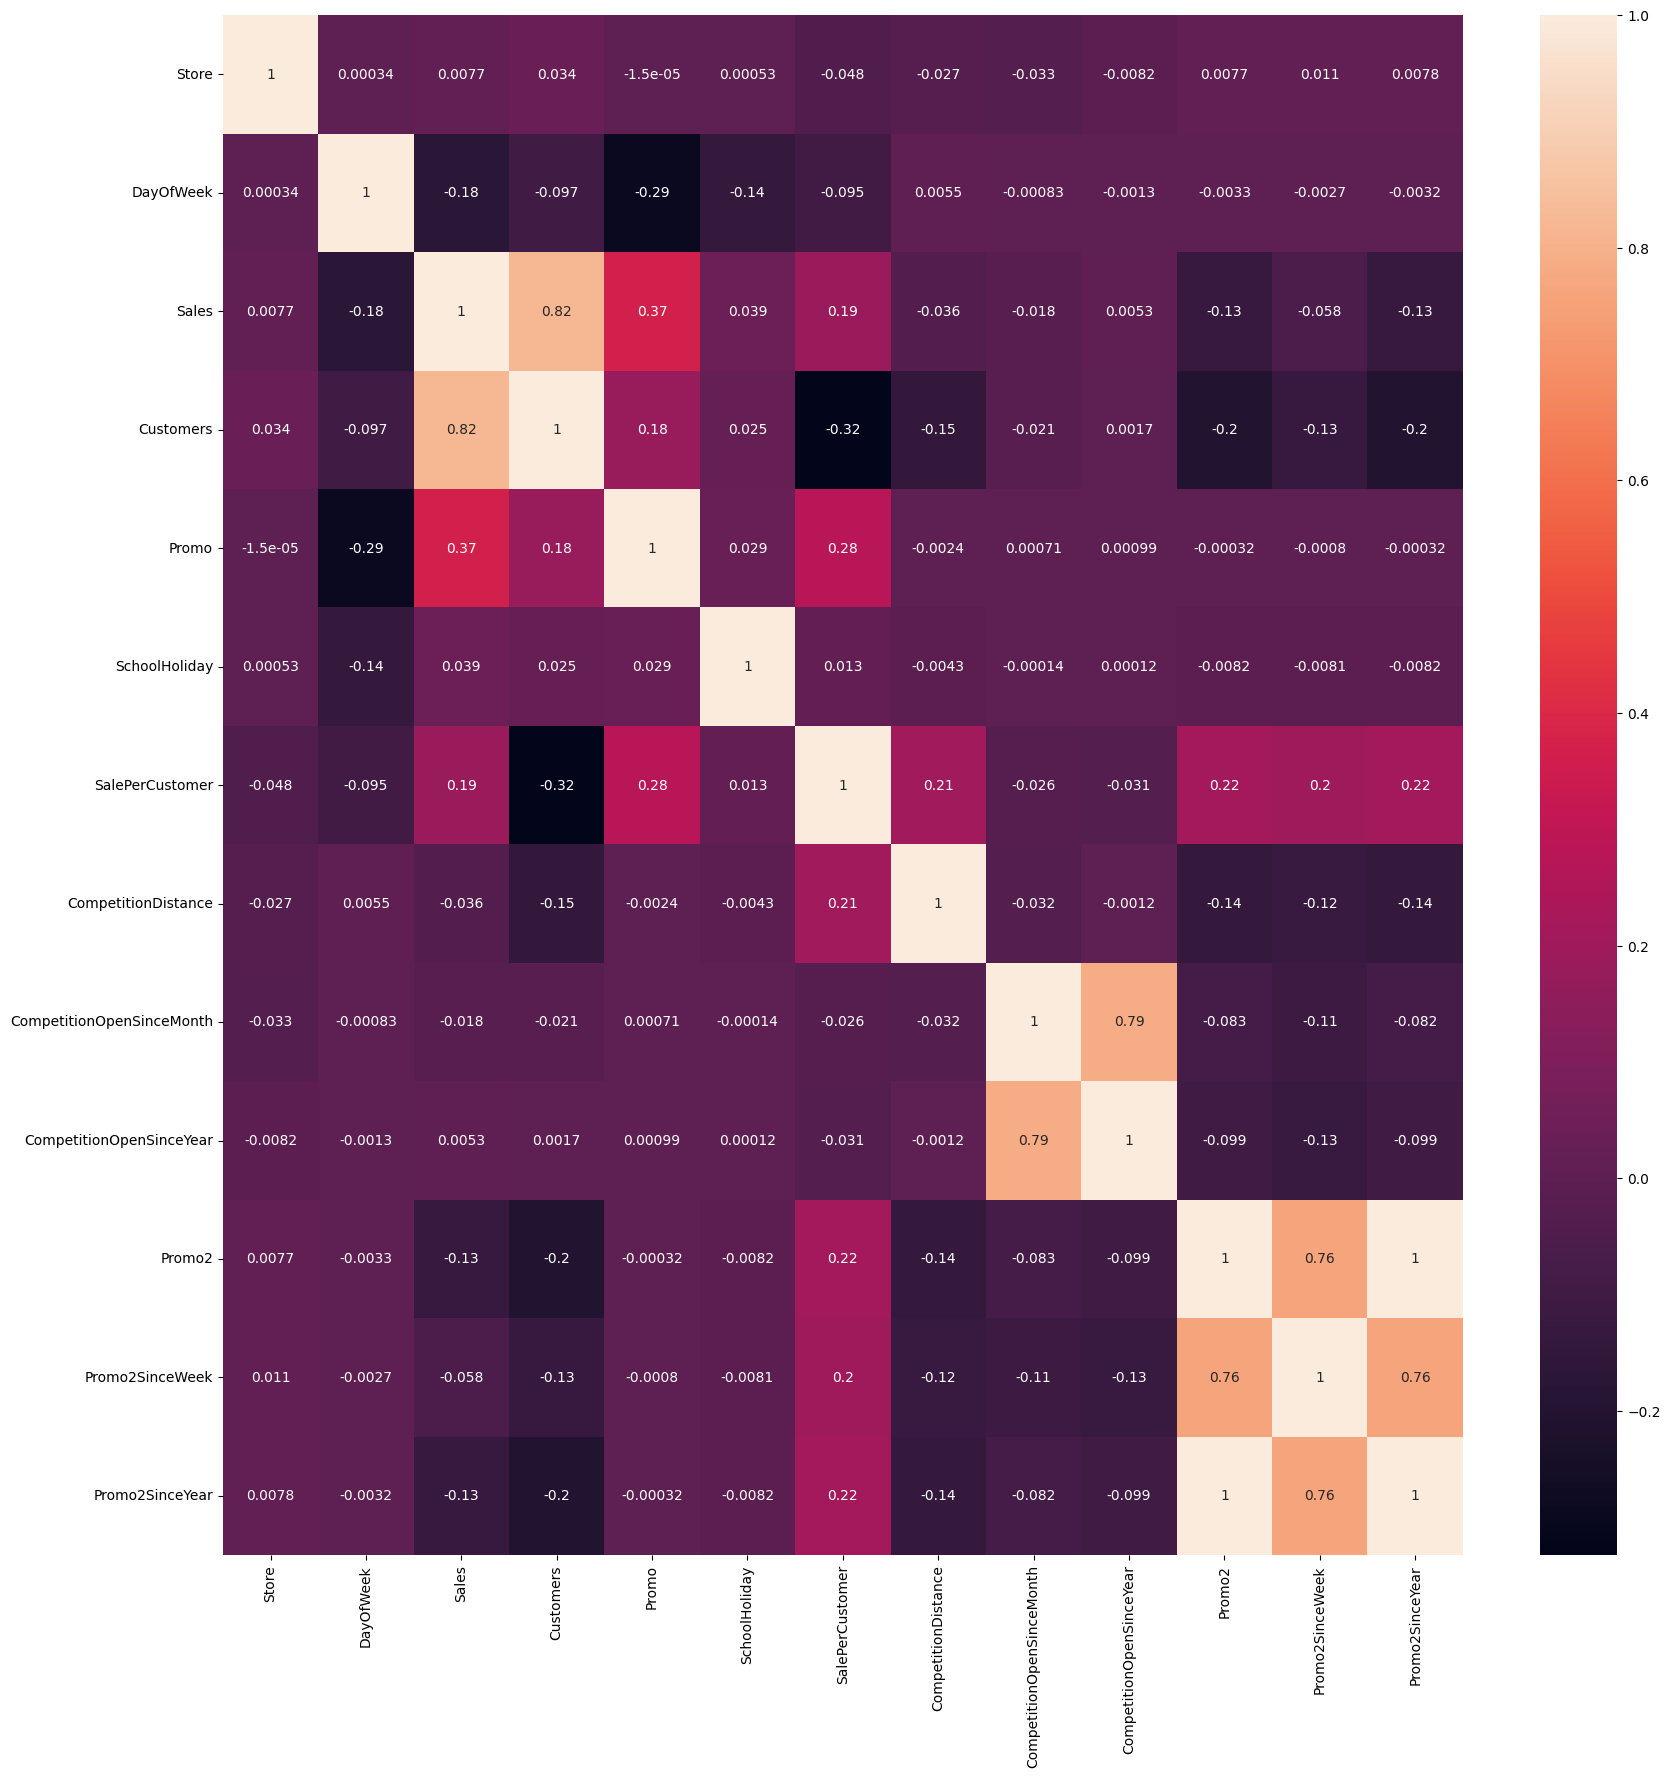

In [ ]:
correlations = sales_train_all_df.drop(["Date", "StateHoliday", "StoreType", "Assortment", "PromoInterval"], axis = 1).corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)
# Customers/Promo and sales are strongly correlated

In [ ]:
sales_train_all_df.groupby('StoreType')[['Customers', 'Sales']].sum()

,Customers,Sales
StoreType,,
a,363541431,3165334859
b,31465616,159231395
c,92129705,783221426
d,156904995,1765392943


Clearly stores of type A is the most selling and crowded one. StoreType D goes on the second place in both Sales and Customers. What about date periods? Seaborn's facet grid is the best tool for this task:

In [ ]:
# Let's separate the year, month, day & week and put them into a separate columns
sales_train_all_df['Date'] = pd.to_datetime(sales_train_all_df['Date'])
sales_train_all_df.set_index('Date', inplace=True)
sales_train_all_df['Year'] = sales_train_all_df.index.year
sales_train_all_df['Month'] = sales_train_all_df.index.month
sales_train_all_df['Day'] = sales_train_all_df.index.day
sales_train_all_df['WeekOfYear'] = sales_train_all_df.index.isocalendar().week
sales_train_all_df.head()


,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,SalePerCustomer,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,0,1,9.482883,c,a,...,9.0,2008.0,0,0.0,0.0,0,2015,7,31,31
2015-07-31,2,5,6064,625,1,0,1,9.702400,a,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2015-07-31,3,5,8314,821,1,0,1,10.126675,a,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2015-07-31,4,5,13995,1498,1,0,1,9.342457,c,c,...,9.0,2009.0,0,0.0,0.0,0,2015,7,31,31
2015-07-31,5,5,4822,559,1,0,1,8.626118,a,a,...,4.0,2015.0,0,0.0,0.0,0,2015,7,31,31


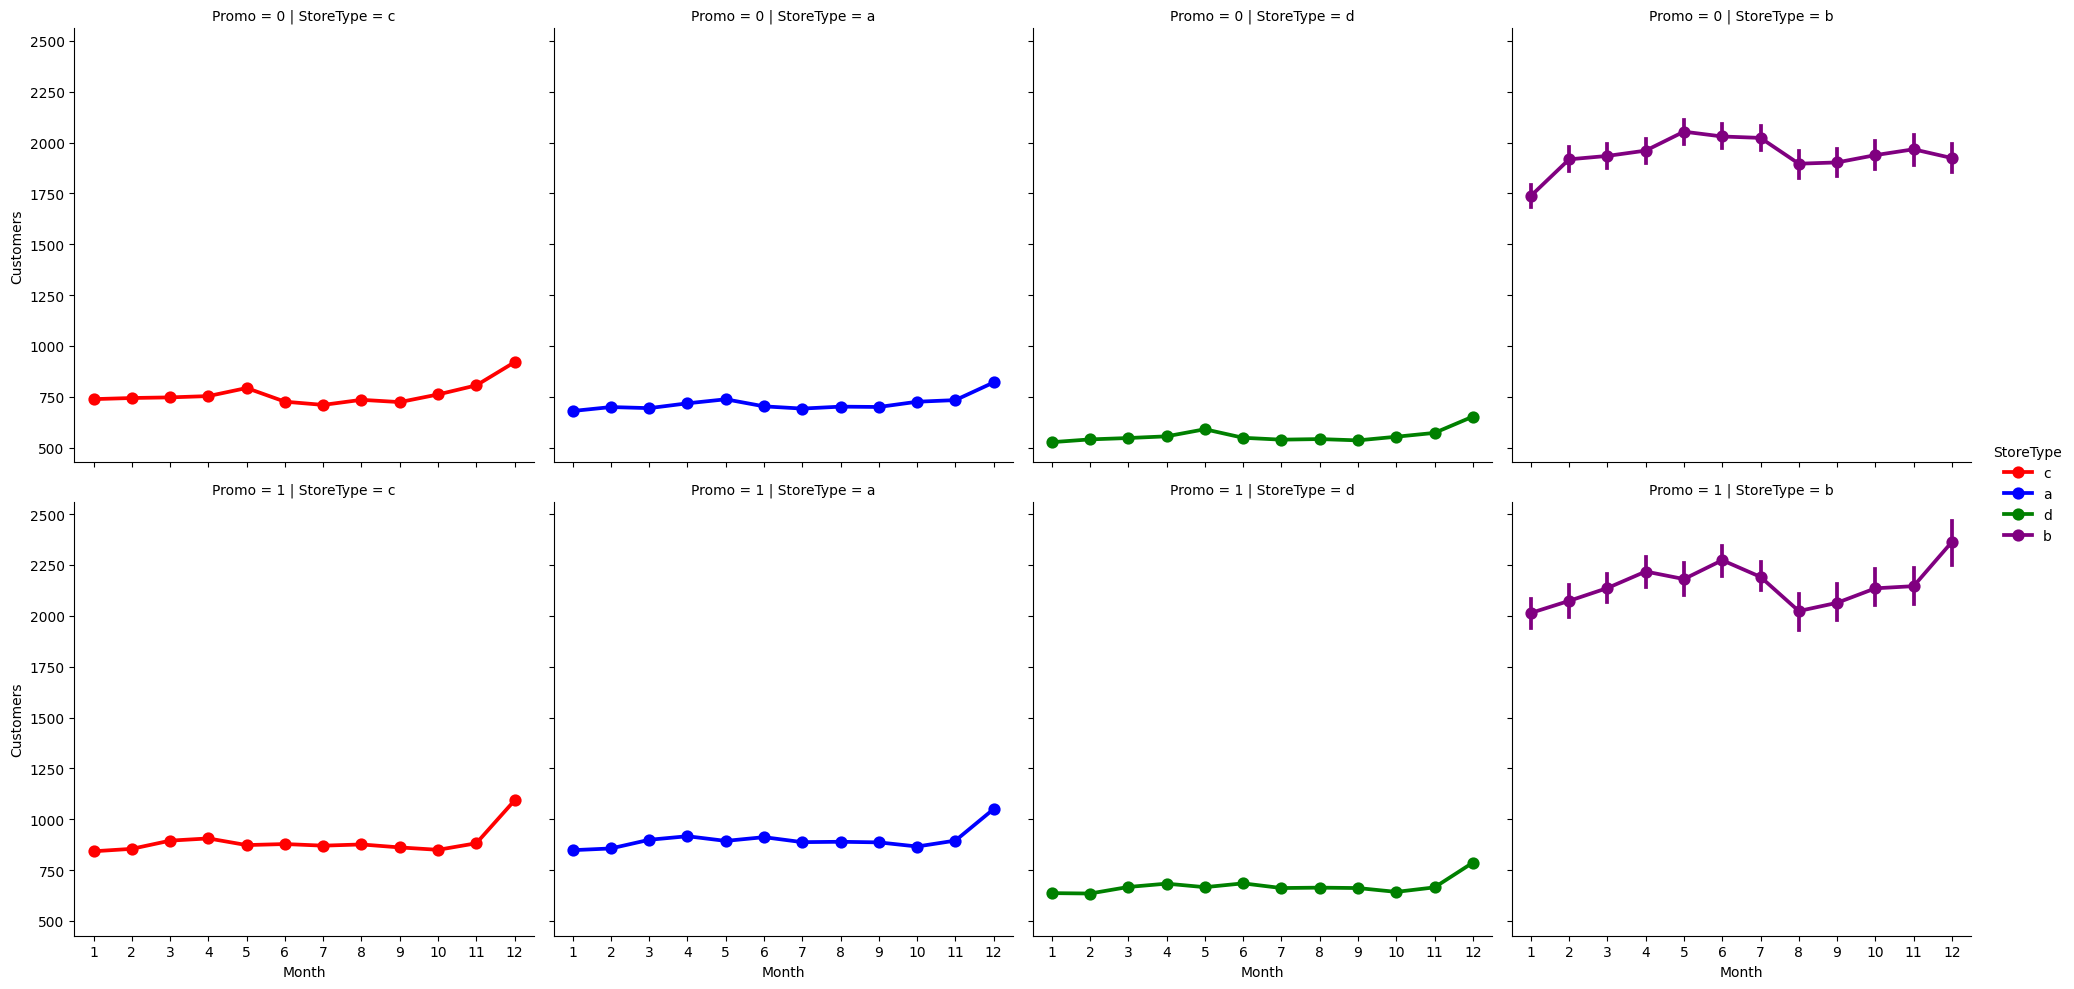

In [ ]:
# Customer trends
sns.catplot(data=sales_train_all_df, x='Month', y="Customers",
            col='StoreType', # per store type in cols
            palette=["red", "blue", "green", "purple"],
            hue='StoreType',
            row='Promo', # per promo in the store in rows
            kind="point")

All store types follow the same trend but at different scales depending on the presence of the (first) promotion Promo and StoreType itself (case for B).<br>

**Already at this point, we can see that Sales escalate towards Christmas holidays. But we'll talk about seasonalities and trends later in the Time Series Analysis section.**

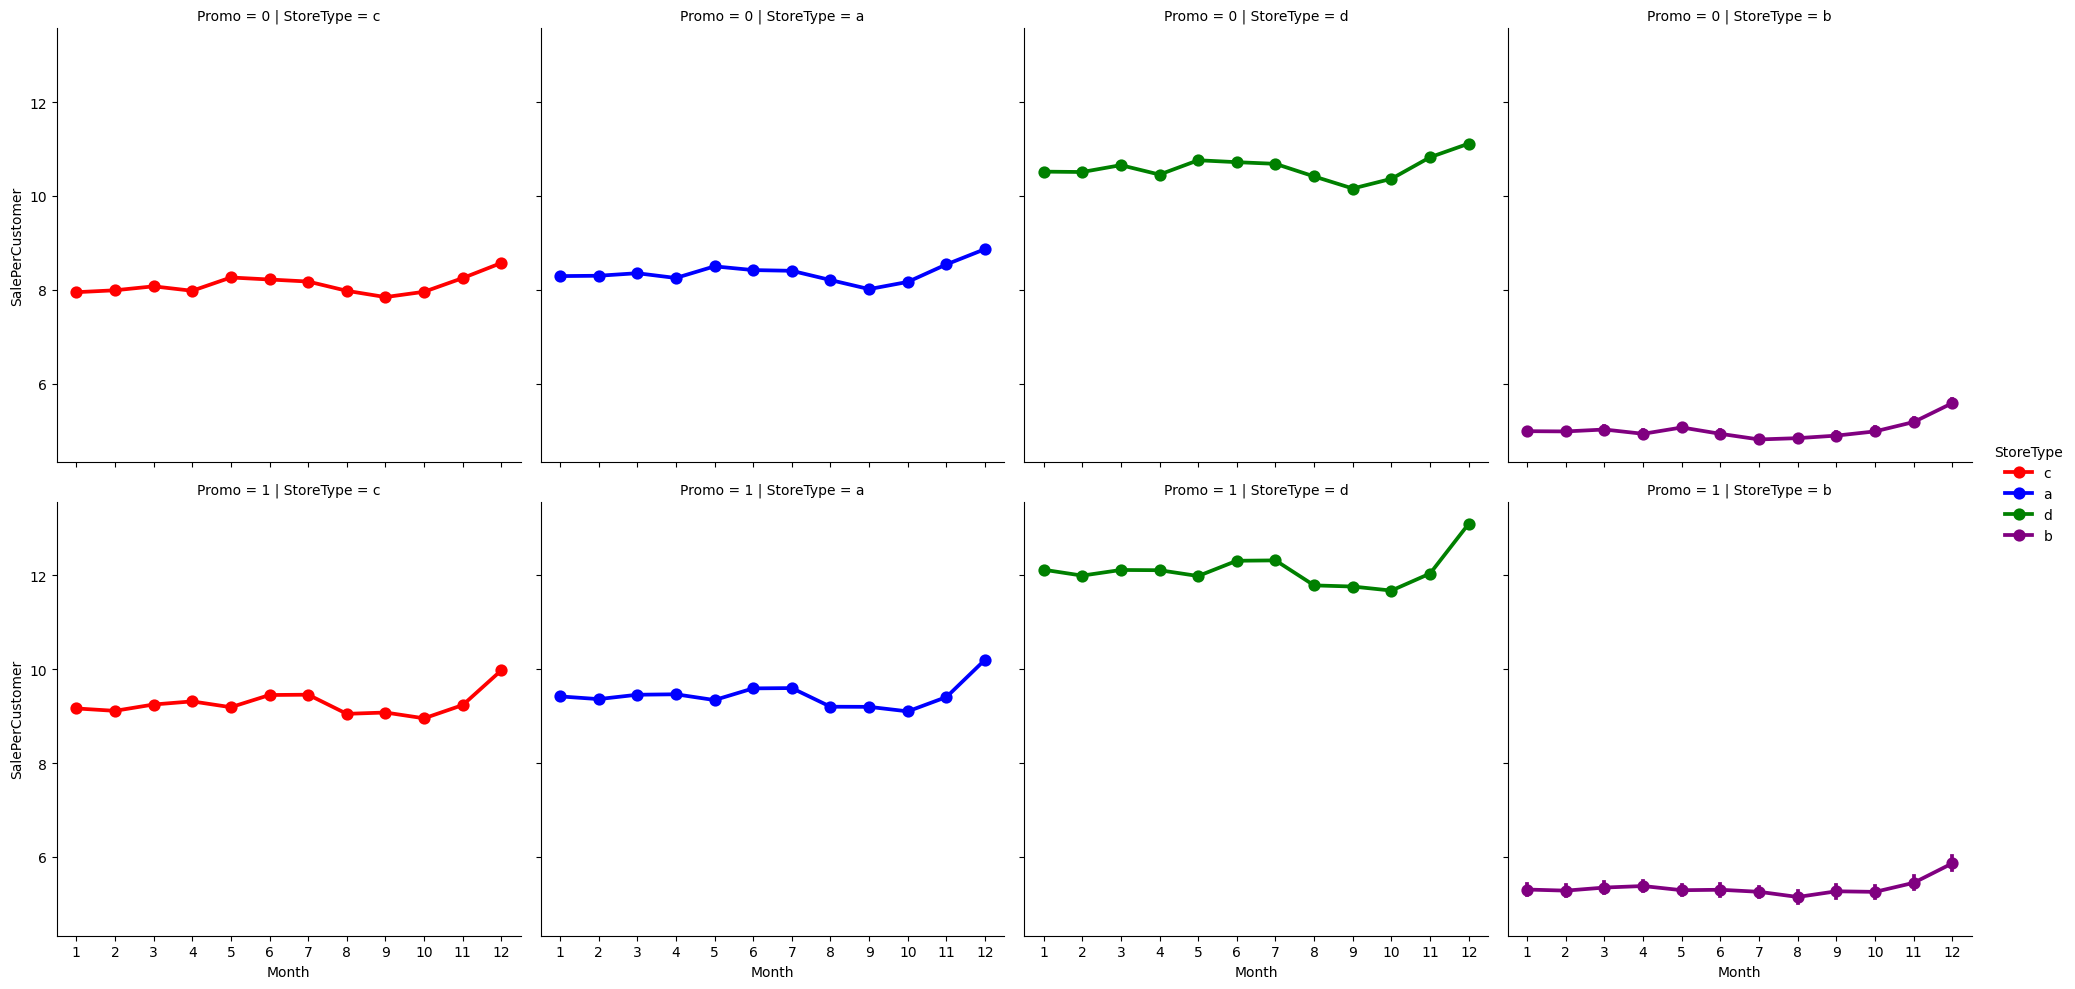

In [ ]:
# sale per customer trends
sns.catplot(data=sales_train_all_df, x='Month', y="SalePerCustomer",
            col='StoreType', # per store type in cols
            palette=["red", "blue", "green", "purple"],
            hue='StoreType',
            row='Promo', # per promo in the store in rows
            kind="point")

Aha! Eventhough the plots above showed StoreType B as the most selling and performant one, in reality it is not true. The highest SalePerCustomer amount is observed at the StoreType D, about 12€ with Promo and 10€ without. As for StoreType A and C it is about 9€.<br>

Low SalePerCustomer amount for StoreType B describes its Buyer Cart: there are a lot of people who shop essentially for "small" things (or in a little quantity). Plus we saw that overall this StoreType generated the least amount of sales and customers over the period.

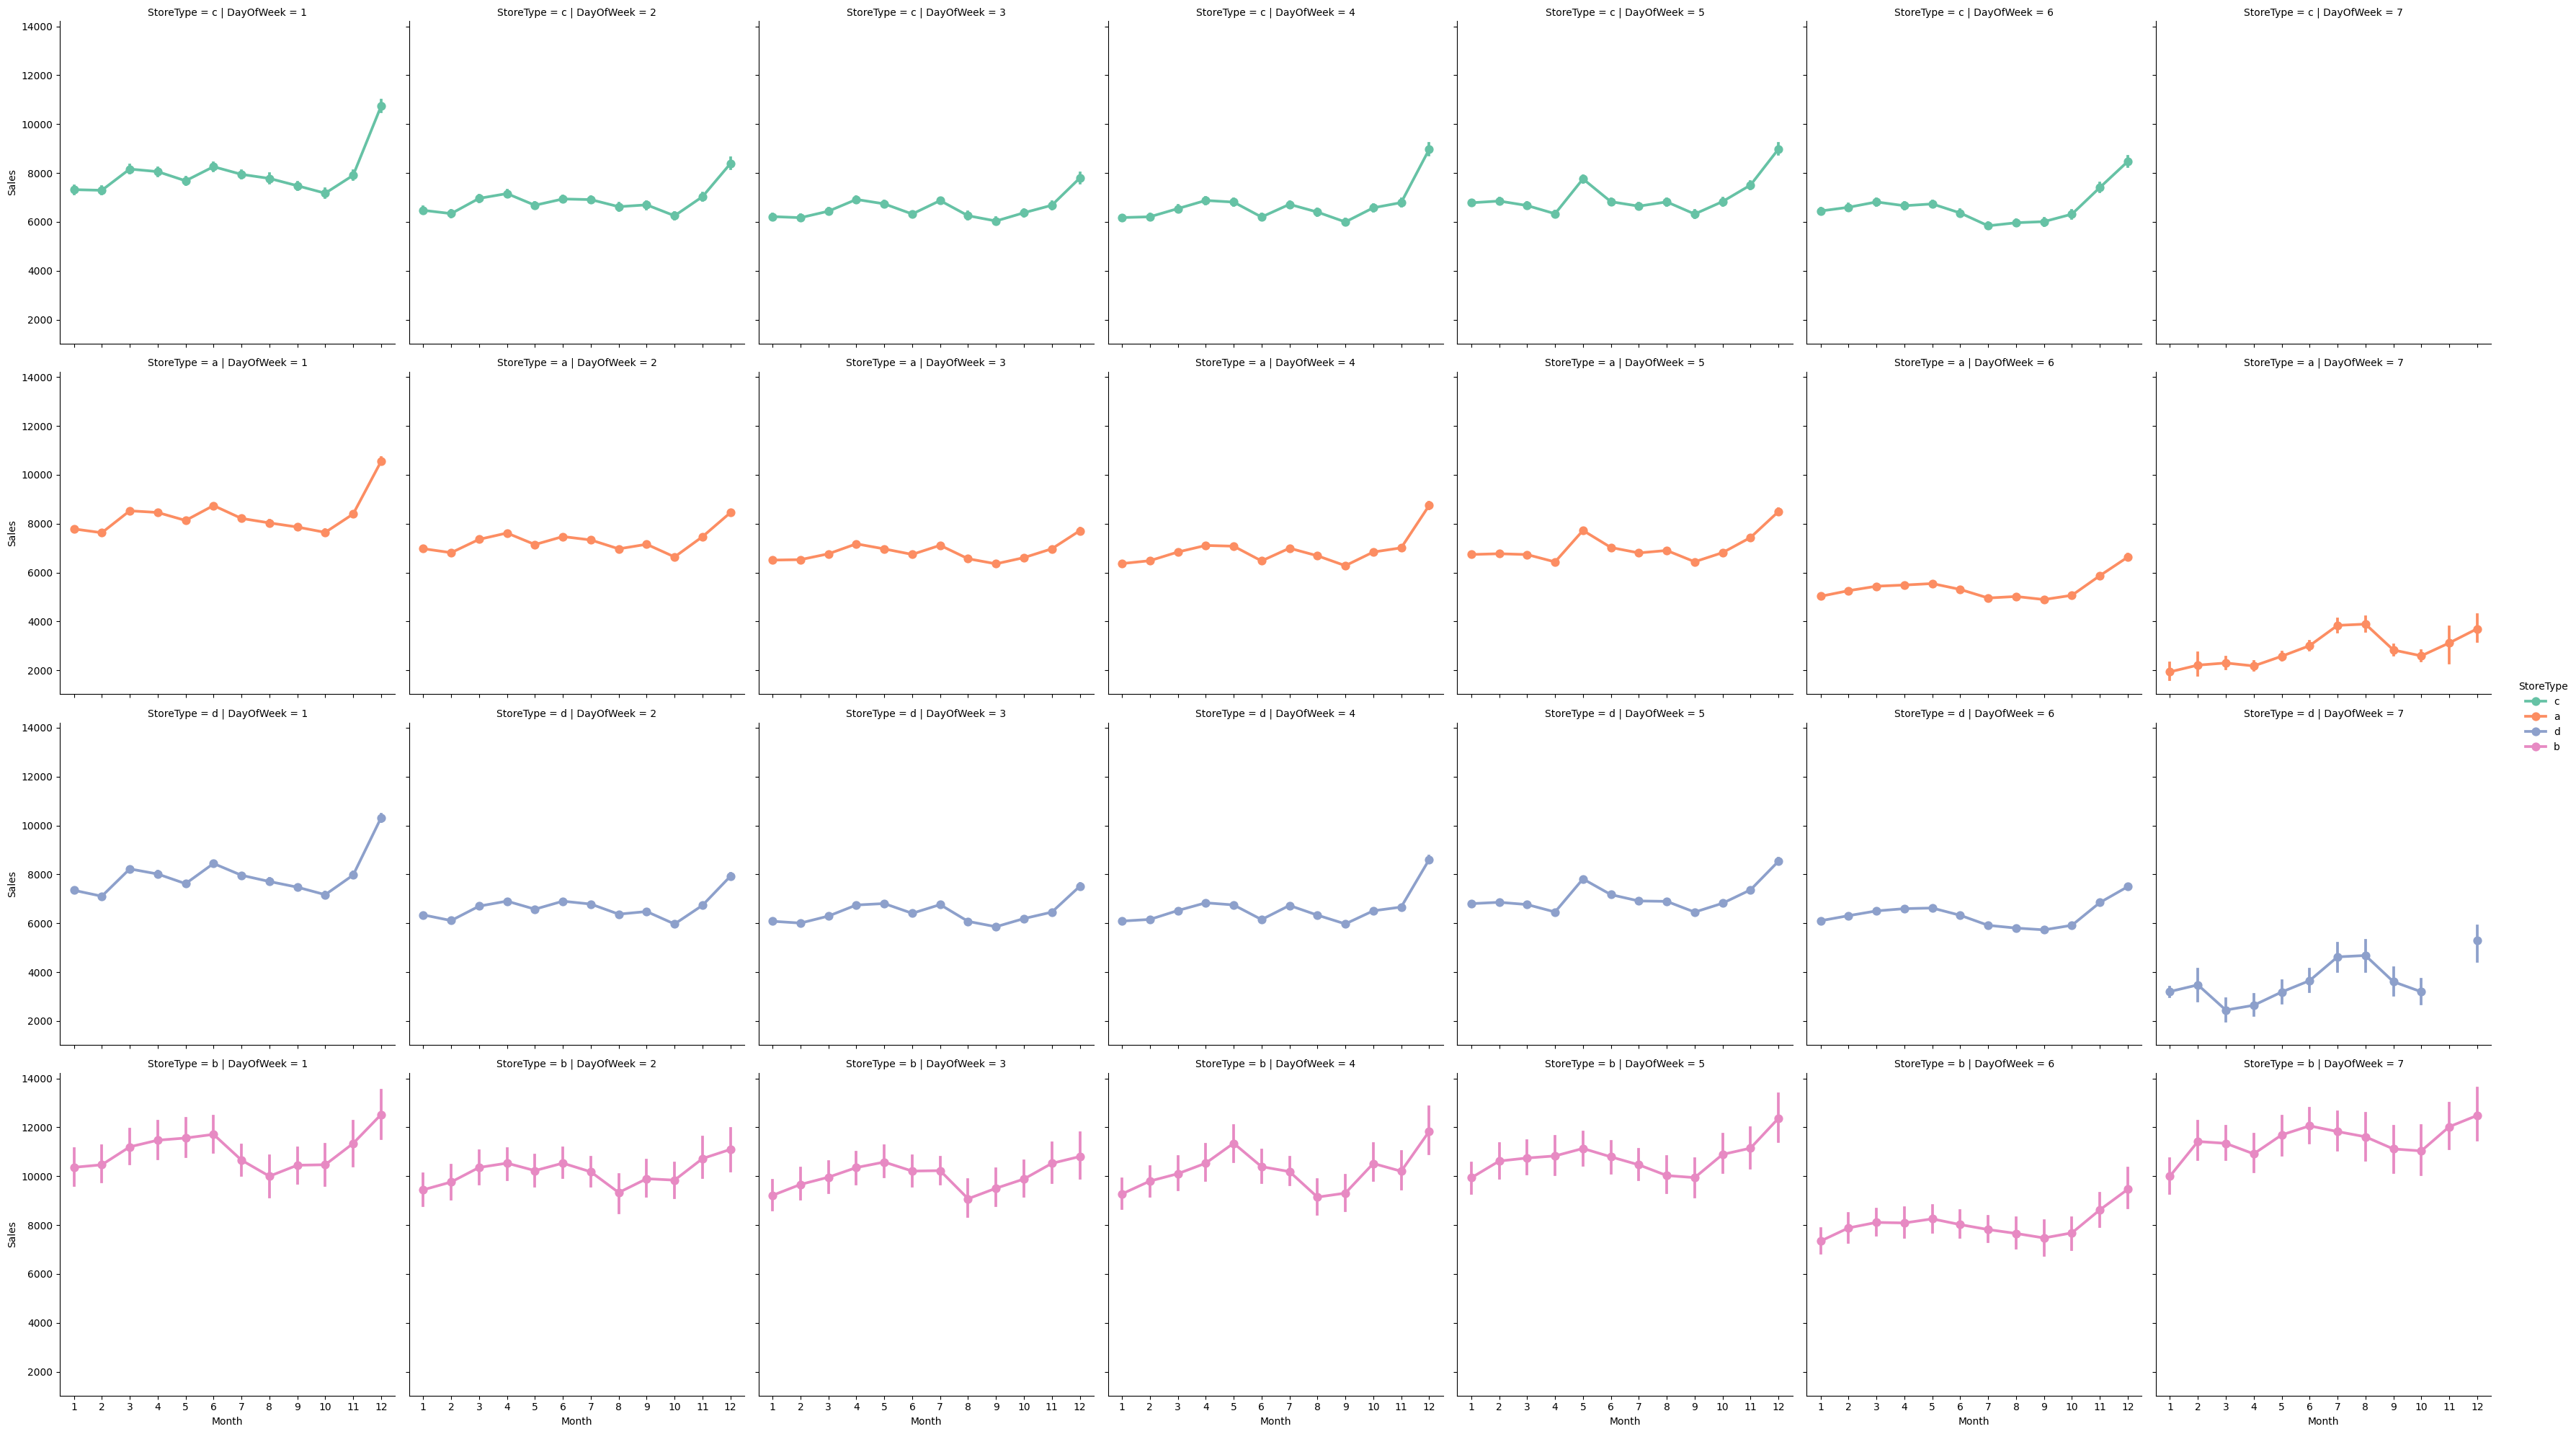

In [ ]:
# Sales
sns.catplot(data=sales_train_all_df, x='Month', y="Sales",
            col='DayOfWeek', # per day of week in cols
            palette="Set2",
            hue='StoreType',
            row='StoreType', # per store type in rows
            kind="point")

We see that stores of StoreType C are all closed on Sundays, whereas others are most of the time opened. Interestingly enough, stores of StoreType D are closed on Sundays only in November.<br>

By the way what are the stores which are opened on Sundays?

In [ ]:
sales_train_all_df[sales_train_all_df.DayOfWeek == 7]['Store'].unique()

array([  85,  122,  209,  259,  262,  274,  299,  310,  335,  353,  423,
        433,  453,  494,  512,  524,  530,  562,  578,  676,  682,  732,
        733,  769,  863,  867,  931,  948, 1045, 1081, 1097, 1099,  877])

Text(0.5, 1.0, 'Average Customer Per Day')

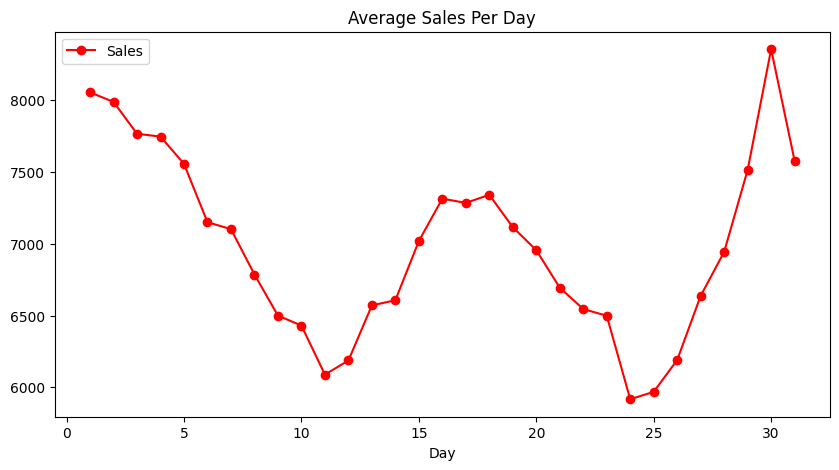

<Figure size 640x480 with 0 Axes>

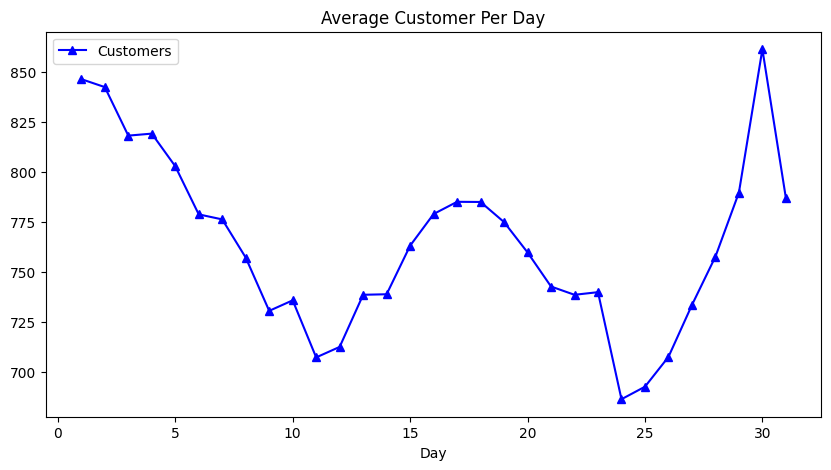

In [ ]:
# Let's take a look at the sales and customers per day of the month instead
# Minimum number of customers are generally around the 24th of the month
# Most customers and sales are around 30th and 1st of the month
ax = sales_train_all_df.groupby('Day')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
ax.set_title('Average Sales Per Day')

plt.figure()
ax = sales_train_all_df.groupby('Day')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
ax.set_title('Average Customer Per Day')

To complete our preliminary data analysis, we can add variables describing the period of time during which competition and promotion were opened:

In [ ]:
# competition open time (in months)
sales_train_all_df['CompetitionOpen'] = 12 * (sales_train_all_df.Year - sales_train_all_df.CompetitionOpenSinceYear) + \
                                        (sales_train_all_df.Month - sales_train_all_df.CompetitionOpenSinceMonth)

# Promo open time (in months)
sales_train_all_df['PromoOpen'] = 12 * (sales_train_all_df.Year - sales_train_all_df.Promo2SinceYear) + \
                                  (sales_train_all_df.WeekOfYear - sales_train_all_df.Promo2SinceWeek) / 4.0

# replace NA's by 0
sales_train_all_df.fillna(0, inplace=True)
sales_train_all_df.head()

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,SalePerCustomer,StoreType,Assortment,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen,PromoOpen
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,0,1,9.482883,c,a,...,0,0.0,0.0,0,2015,7,31,31,82.0,24187.75
2015-07-31,2,5,6064,625,1,0,1,9.702400,a,a,...,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0,64.5
2015-07-31,3,5,8314,821,1,0,1,10.126675,a,a,...,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0,52.25
2015-07-31,4,5,13995,1498,1,0,1,9.342457,c,c,...,0,0.0,0.0,0,2015,7,31,31,70.0,24187.75
2015-07-31,5,5,4822,559,1,0,1,8.626118,a,a,...,0,0.0,0.0,0,2015,7,31,31,3.0,24187.75


In [ ]:
# average PromoOpen time and CompetitionOpen time per store type
sales_train_all_df.loc[:, ['StoreType', 'Sales', 'Customers', 'PromoOpen', 'CompetitionOpen']].groupby('StoreType').mean()

,Sales,Customers,PromoOpen,CompetitionOpen
StoreType,,,,
a,6925.697986,795.422370,12918.492198,7115.514452
b,10233.380141,2022.211825,17199.328069,11364.495244
c,6933.126425,815.538073,12158.636107,6745.418694
d,6822.300064,606.353935,10421.916846,9028.526526


The most selling and crowded StoreType A doesn't appear to be the one the most exposed to competitors. Instead it's a StoreType B, which also has the longest running period of promotion.

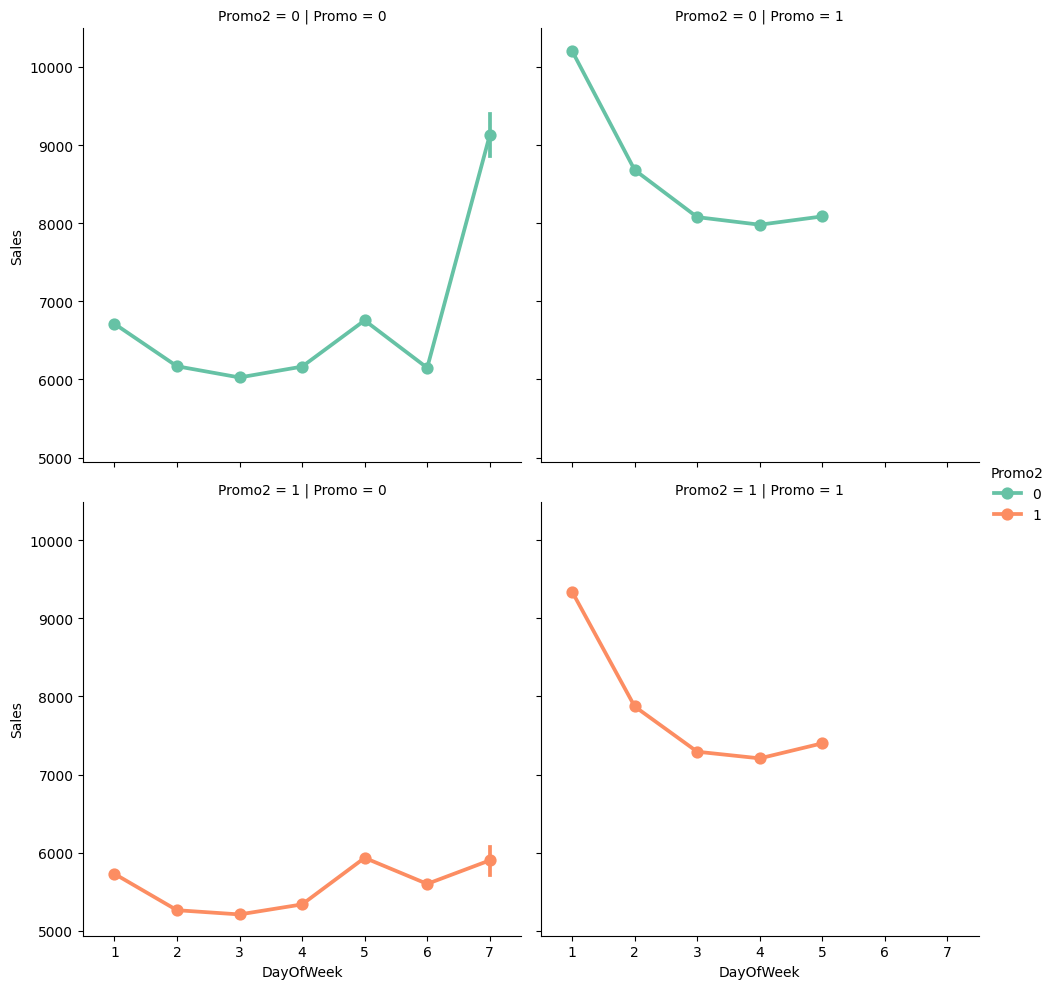

In [ ]:
# sale per customer trends
sns.catplot(data=sales_train_all_df, x='DayOfWeek', y="Sales",
            col='Promo',
            palette="Set2",
            hue='Promo2',
            row='Promo2',
            kind="point")

There are several things here:<br><br>
1.In case of no promotion, both Promo and Promo2 are equal to 0, Sales tend to peak on Sunday (!). Though we should note that StoreType C doesn't work on Sundays. So it is mainly data from StoreType A, B and D.<br>
2.On the contrary, stores that run the promotion tend to make most of the Sales on Monday. This fact could be a good indicator for Rossmann marketing campaigns. The same trend follow the stores which have both promotion at the same time (Promo and Promo2 are equal to 1).<br>
3.Promo2 alone doesn't seem to be correlated to any significant change in the Sales amount. This can be also proved by the line chart in the third quadrant

Conclusion of EDA<br><br>
1.The most selling and crowded StoreType is A.<br>
2.The best "Sale per Customer" StoreType D indicates to the higher Buyer Cart. To benefit from this fact, Rossmann can consider proposing bigger variety of its products.<br>
3.Low SalePerCustomer amount for StoreType B indicates to the possible fact that people shop there essentially for "small" things. Eventhough this StoreType generated the least amount of sales and customers over the whole period, it shows a great potential.<br>
4.Customers tends to buy more on Mondays when there's one promotion (Promo) and on Sundays when there's no promotion at all (both Promo and Promo1 are equal to 0).<br>
5.Promo2 alone doesn't seem to be correlated to any significant change in the Sales amount.

Time-Series Analysis per Store Type<br><br>
What makes a time series different from a regular regression problem?<br>

- It is time-dependent. The basic assumption of a linear regression that the observations are independent doesn’t hold in this case.
- Along with an increasing or decreasing trend, most time series have some form of seasonality trends, i.e. variations specific to a particular time frame. For example, for Christmas holidays, which we will see in this dataset.<br>

We build a time series analysis on store types instead of individual stores. The main advantage of this approach is its simplicity of presentation and overall account for different trends and seasonalities in the dataset.<br>

In this section, we will analyse time series data: its trends, sesonalities and autocorrelation. Usually at the end of the analysis, we are able to develop a seasonal ARIMA (Autoregression Integrated Moving Average) model but it won't be our main focus today. Instead, we try to understand the data, and only later come up with the forecasts using Prophet methodology.<br><br>

Seasonality<br><br>
We take four stores from store types to represent their group:
- Store number 2 for StoreType A
- Store number 85 for StoreType B,
- Store number 1 for StoreType C
- Store number 13 for StoreType D.<br>

It also makes sense to downsample the data from days to weeks using the resample method to see the present trends more clearly.

<Axes: xlabel='Date'>

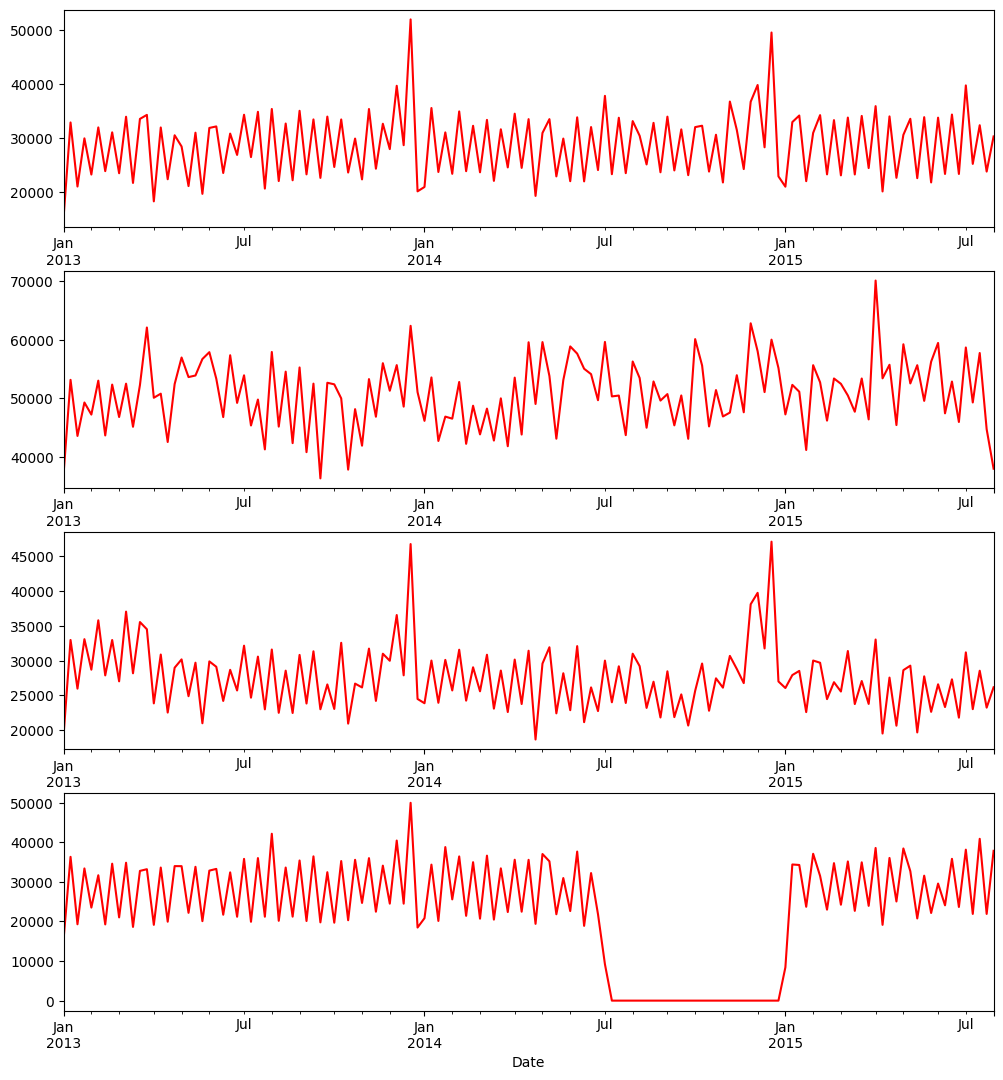

In [ ]:
# preparation: input should be float type
sales_train_all_df['Sales'] = sales_train_all_df['Sales'] * 1.0

# store types
sales_a = sales_train_all_df[sales_train_all_df.Store == 2]['Sales']
sales_b = sales_train_all_df[sales_train_all_df.Store == 85]['Sales'].sort_index(ascending = True) # solve the reverse order
sales_c = sales_train_all_df[sales_train_all_df.Store == 1]['Sales']
sales_d = sales_train_all_df[sales_train_all_df.Store == 13]['Sales']

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (12, 13))

sales_a.resample('W').sum().plot(color='red', ax = ax1)
sales_b.resample('W').sum().plot(color='red', ax = ax2)
sales_c.resample('W').sum().plot(color='red', ax = ax3)
sales_d.resample('W').sum().plot(color='red', ax = ax4)

Retail sales for StoreType A and C tend to peak for the Christmas season and then decline after the holidays. We might have seen the same trend for StoreType D (at the bottom) but there is no information from July 2014 to January 2015 about these stores as they were closed.<br><br>

Yearly trend<br><br>

The next thing to check the presence of a trend in series.

<Axes: xlabel='Date'>

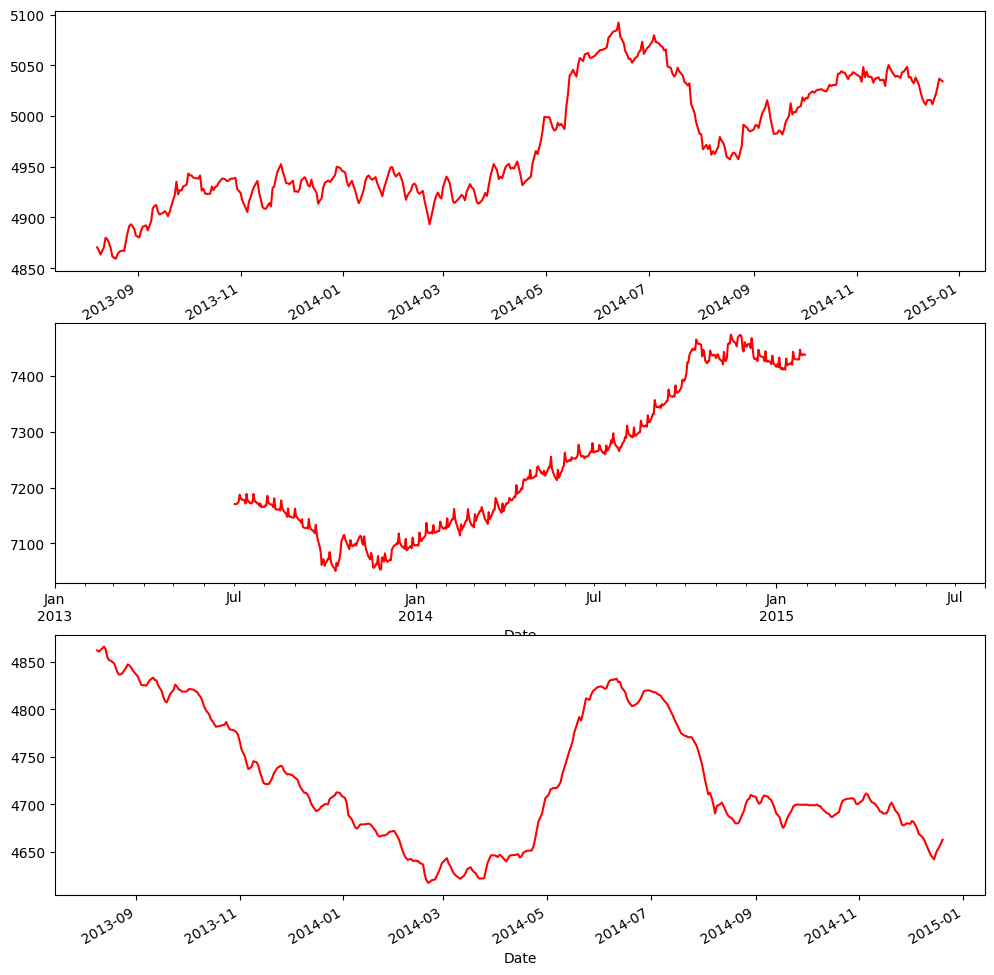

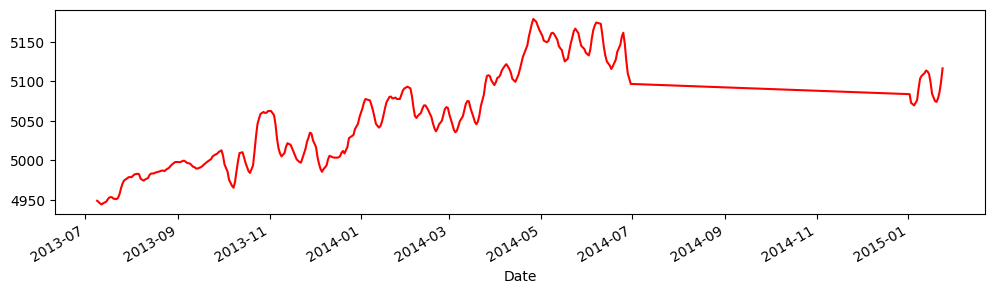

In [ ]:
# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
f, (ax1, ax2, ax3) = plt.subplots(3, figsize = (12, 13))

# monthly
decomposition_a = seasonal_decompose(sales_a, model = 'additive', period = 365)
decomposition_a.trend.plot(color='red', ax = ax1)

decomposition_b = seasonal_decompose(sales_b, model = 'additive', period = 365)
decomposition_b.trend.plot(color='red', ax = ax2)

decomposition_c = seasonal_decompose(sales_c, model = 'additive', period = 365)
decomposition_c.trend.plot(color='red', ax = ax3)

f, (ax4) = plt.subplots(1, figsize = (12, 3))
decomposition_d = seasonal_decompose(sales_d, model = 'additive', period = 310)
decomposition_d.trend.plot(color='red', ax = ax4)

Overall sales seems to increase, however not for the StoreType C (a third from the top). Eventhough the StoreType A is the most selling store type in the dataset, it seems that it cab follow the same decreasing trajectory as StoreType C did.<br><br>

Autocorrelaion<br>
The next step in ourtime series analysis is to review Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots.<br><br>

ACF is a measure of the correlation between the timeseries with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’tn’ with series at instant ‘t1-5’…’tn-5’ (t1-5 and tn being end points).<br><br>

PACF, on the other hand, measures the correlation between the timeseries with a lagged version of itself but after eliminating the variations explained by the intervening comparisons. Eg. at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

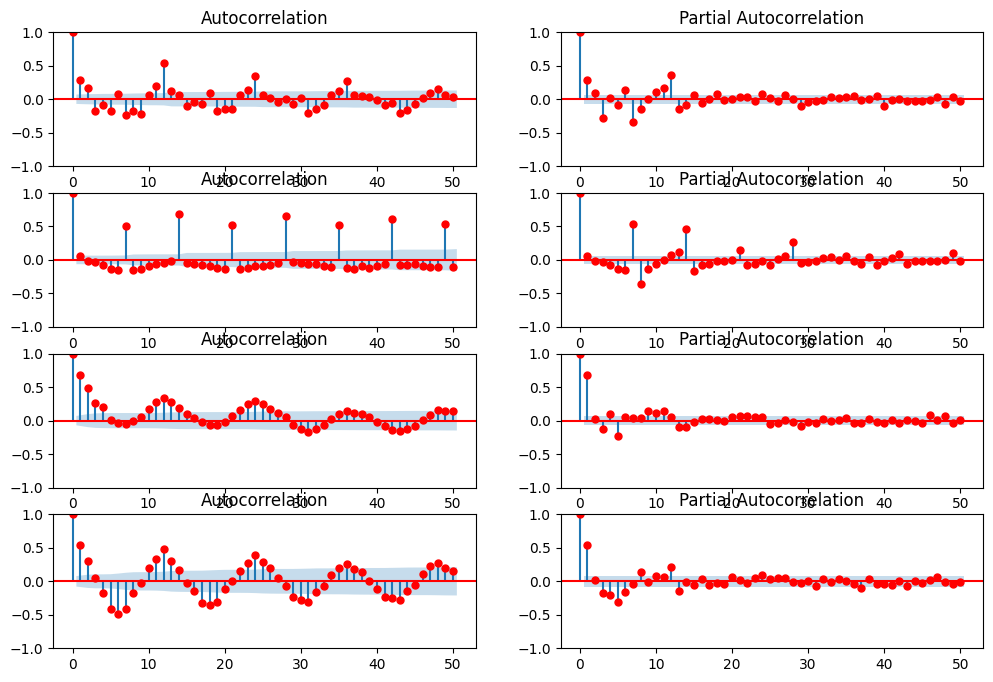

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# figure for subplots
plt.figure(figsize = (12, 8))

# acf and pacf for A
plt.subplot(421); plot_acf(sales_a, lags = 50, ax = plt.gca(), color = 'red')
plt.subplot(422); plot_pacf(sales_a, lags = 50, ax = plt.gca(), color = 'red')

# acf and pacf for B
plt.subplot(423); plot_acf(sales_b, lags = 50, ax = plt.gca(), color = 'red')
plt.subplot(424); plot_pacf(sales_b, lags = 50, ax = plt.gca(), color = 'red')

# acf and pacf for C
plt.subplot(425); plot_acf(sales_c, lags = 50, ax = plt.gca(), color = 'red')
plt.subplot(426); plot_pacf(sales_c, lags = 50, ax = plt.gca(), color = 'red')

# acf and pacf for D
plt.subplot(427); plot_acf(sales_d, lags = 50, ax = plt.gca(), color = 'red')
plt.subplot(428); plot_pacf(sales_d, lags = 50, ax = plt.gca(), color = 'red')

plt.show()

We can read these plots horizontally. Each horizontal pair is for one 'StoreType', from A to D. In general, those plots are showing the correlation of the series with itself, lagged by x time units correlation of the series with itself, lagged by x time units.<br><br>

There is at two things common for each pair of plots: non randomnes of the time series and high lag-1 (which will probably need a higher order of differencing d/D).<br><br>

- Type A and type B: Both types show seasonalities at certain lags. For type A, it is each 12th observation with positives spikes at the 12 (s) and 24(2s) lags and so on. For type B it's a weekly trend with positives spikes at the 7(s), 14(2s), 21(3s) and 28(4s) lags.
- Type C and type D: Plots of these two types are more complex. It seems like each observation is coorrelated to its adjacent observations.

In [ ]:
sales_train_all_df.head()

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,SalePerCustomer,StoreType,Assortment,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen,PromoOpen
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,5263.0,555,1,0,1,9.482883,c,a,...,0,0.0,0.0,0,2015,7,31,31,82.0,24187.75
2015-07-31,2,5,6064.0,625,1,0,1,9.702400,a,a,...,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0,64.5
2015-07-31,3,5,8314.0,821,1,0,1,10.126675,a,a,...,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0,52.25
2015-07-31,4,5,13995.0,1498,1,0,1,9.342457,c,c,...,0,0.0,0.0,0,2015,7,31,31,70.0,24187.75
2015-07-31,5,5,4822.0,559,1,0,1,8.626118,a,a,...,0,0.0,0.0,0,2015,7,31,31,3.0,24187.75


In [ ]:
sales_train_all_df.to_csv('../input_data/rossmann_store_sales/sales_train_all.csv', index=False)